# Physics 233, python Exercises for Hughes and Hase: Chapter 5
Python activities to complement _Measurements and their Uncertainties_,
Chapter 5, "Data visualization and reduction."

Author: J. S. Dodge, 2019 ©

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Make a scatterplot
Consider the data tabulated in Prob. (5.3), taken from an experiment to verify Ohm's law.

In [2]:
# Current in µA, from 10 to 90 in steps of 10
current = np.arange(10,100,10)
# Measured voltage in mV
voltage = np.array([0.98, 1.98, 2.98, 3.97, 4.95, 5.95, 6.93, 7.93, 8.91])

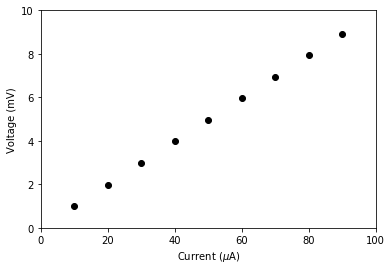

In [3]:
# Make plot of voltage versus current, with
# black circles ('ko') as markers
plt.plot(current,voltage,'ko')

# Set labels. We precede xlabel by 'r' to denote a raw string so
# the parser can recognize the LaTeX string enclosed by '$'.
plt.xlabel(r'Current ($\mu$A)')
plt.ylabel('Voltage (mV)')

# Set limits for x- and y- axes
plt.xlim(0,100)
plt.ylim(0,10)

plt.show()

## Linearizing data: direct transformation
Linearizing a graph can be a very effective way to demonstrate the validity of certain functional relationships between two quantities. Consider first the example given in the text, the period $T$ of a pendulum as a function of its length $L$. Use the random number generator to simulate period measurements with a constant standard error $\alpha_T = 0.1$ s, for pendulum lengths ranging from 10 cm to 100 cm. Use `T` for the model prediction, and `Tm` for the simulated measurements.

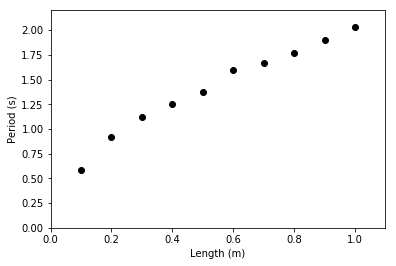

In [4]:
L = np.arange(0.1,1.1,0.1) # m
g = 9.8                    # m/s^2
T = 2*np.pi*np.sqrt(L/g)   # s

rng = np.random.RandomState(0)
alphaT = 0.03
Tm = T + alphaT*np.random.randn(T.size)

plt.plot(L,Tm,'ko')

plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

plt.xlim(0,1.1)
plt.ylim(0,2.2)

plt.show()

Now plot `Tm.^2` versus `L` to linearize the graph. One advantage of a linear plot is that you can assess its quality visually just by positioning a straight edge through the data—try this with both of these plots, and notice that the original plot looks fairly linear, but that a linear fit doesn't pass through the origin. This is obviously wrong: even if you didn't know the functional relationship between the period and the pendulum length, the period clearly must be zero when the length is zero. In contrast, the plot of `Tm.^2` versus `L` is consistent with a linear fit that passes through the origin.

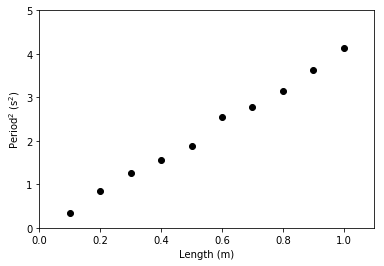

In [5]:
plt.plot(L,Tm**2,'ko')

plt.xlabel('Length (m)')
plt.ylabel(r'Period$^2$ (s$^2$)')

plt.xlim(0,1.1)
plt.ylim(0,5)

plt.show()

## Linearizing data: log-log plot
Yet another way to linearize the same data is to use a `loglog` plot. These are useful for identifying a power-law relationship between two quantities, i.e.,

$$ y = Ax^\alpha, $$

where $A$ and $\alpha$ are unknown. Taking the logarithm of both sides yields a linear relatonship between $\log y$ and $\log x$:

$$ \log y = log A + \alpha\log x. $$

Use `loglog` to demonstrate this with the `L`, `Tm` data. Show the data as black circles (`ko`), and add a red line (`r-`) to show the model behavior, `T`, and a blue dashed line (`b--`) to show `sqrt(L)`, to demonstrate the advantage of using `loglog` to identify a power-law functional dependence. The data fall approximately on a straight line, with a slope similar to the plot of `sqrt(L)` versus `L`.

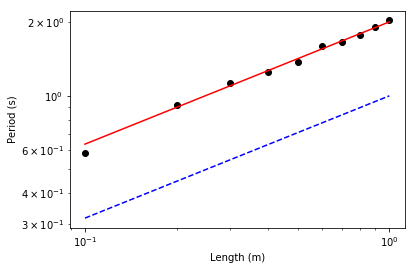

In [6]:
plt.loglog(L,Tm,'ko',L,T,'r-',L,np.sqrt(L),'b--')

plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

#plt.xlim(0,1.1)
#plt.ylim(0,5)

plt.show()

## Linearizing data: semilog plot
Yet another common linearization method uses the `semilogx` and `semilogy` functions, which is useful to demonstrate an exponential functional dependence. Consider, for example, the voltage across a 47 nF capacitor as it discharges from an initial value of 1 V across a 100 kOhm resistor. Add noise with a 10 microvolt amplitude using the random number generator.

In [7]:
t = np.linspace(0,100)    # s
R = 100e3                 # Ohm
C = 47e-9                 # Farad
tau = R*C*1000            # ms
V0 = 1                    # V
alphaV = 10e-6            # V

V = V0*np.exp(-t/tau)
Vm = V + alphaV*np.random.randn(t.size)

First plot the data using linear scales.

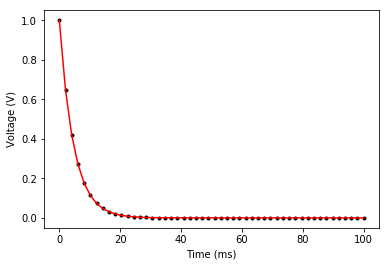

In [8]:
plt.plot(t,Vm,'k.',t,V,'r-')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')

plt.show()

Now plot it on a semilog y scale.

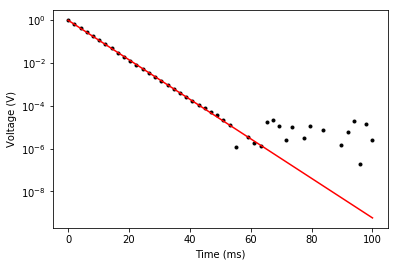

In [9]:
plt.semilogy(t,Vm,'k.',t,V,'r-')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')

plt.show()

The linear plot shows little variation for `t` greater than 20 ms, while the semilog plot allows this data to be visualized much more effectively. The model function appears as a straight line on the semilogy plot, while the data follows a straight line for `t` less than about 50 ms. As `t` increases above 50 ms, the noise begins to dominate and the voltage fluctuates randomly with a 10 microvolt width about zero. Some of these fluctuations have negative values that must be excluded from the plot because their logarithm is undefined. Most of the remaining positive values are greater than 1 microvolt: with 10 microvolt Gaussian noise centered at zero, it is more than ten times more likely that the voltage will be greater than one microvolt than between one microvolt and zero.

## Your turn
Now it's your turn: the following cells simulate the results of a few functional relationships that you might expect to see in PHYS 233. For each set of simulated data, make a nicely-formatted plot using standard linear scales for both the independent and dependent variables. Then, if appropriate, produce another nicely-formatted plot that shows the functional relationship between the dependent and independent variables more clearly.

### Beta-ray absorption
You have measurements of detector Geiger counts that are acquired in a one-minute interval after passing through various thicknesses of a material. We assume here that the beta rays are monoenergetic, though normally they are not (which is how the neutrino was originally postulated). You are using the counts as a function of absorber thickness to determine the range of beta rays in the absorber.

In [10]:
z = np.arange(0,5,.1) # Thickness in mm
zr = 0.3              # Assume 0.3 mm range
N0 = 10000            # Counts with no absorber
N = N0*np.exp(-z/zr)  # Assume exponential decay with thickness
                      # (Note that this is not generally the case)
alphaN = np.sqrt(N)   # Poisson uncertainty in N
Nm = N + np.random.randn(N.size) # Simulated counts

### Current balance
You have measurements of force as a function of current, which you are using to determine the value of the permittivity of free space, $\mu_0$.

In [11]:
current = np.arange(0,1,.1) # Current in amperes
mu0 = 4*np.pi*1e-7          # Permeability of free space
ell = 0.1                   # Assume conductors with length 10 cm
d = 2e-3                    # Assume separation of 2 mm

F = mu0*ell*current**2/(2*np.pi*d) # Force in newtons
alphaF = 0.1e-6                    # Assume constant 0.1 µN force uncertainty

Fm = F + alphaF*np.random.randn(F.size)

### Coulomb's law
You have measurements of the force between two 1 nC charges as a function of distance, which you are using to check the $1/r^2$ dependence of Coulomb's law and determine the permittivity of free space $\epsilon_0$.

In [12]:
r = np.arange(1,10,.5)*1e-2 # Distance in cm
epsilon0 = 8.854e-9         # Permittivity of free space in F/m
Q = 1e-9                    # Charge in coulombs

F = Q**2/(4*np.pi*epsilon0*r**2) # Force in newtons
alphaF = 10e-9                   # Assume constant 10 nN force uncertainty

Fm = F + alphaF*np.random.randn(F.size)